## Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import numpy as np




## Import DatA

In [5]:
df=pd.read_csv(r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [6]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Visualize the data

<AxesSubplot:title={'center':'Hours VS Scores'}, xlabel='Hours', ylabel='Scores'>

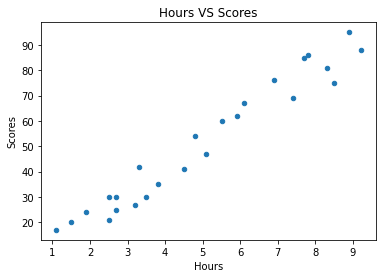

In [8]:
df.plot.scatter(x='Hours',y='Scores',title ="Hours VS Scores")

## Data preprocesing

In [9]:
X=df.drop('Scores',axis=1).values
y=df['Scores'].values
print(X.shape)
print(y.shape)
y=y.reshape(-1,1)

(25, 1)
(25,)


In [10]:
print(y.shape)

(25, 1)


## DATA Splitting

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Model Training

In [12]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

## Equation of line y=ax+b

In [13]:
line=reg.coef_*X_train+reg.intercept_

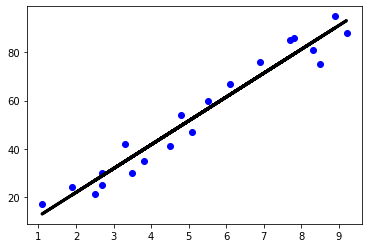

In [14]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,line,color='black',linewidth=3)
plt.show()

In [15]:
y_pred=reg.predict(X_test)

In [16]:
df1=pd.DataFrame({'Actual':y_test[:,0],'Predicted':y_pred[:,0],'Difference':y_test[:,0] - y_pred[:,0]})
df1

,Actual,Predicted,Difference
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


In [17]:
print("training Score:",reg.score(X_train,y_train))
print("testing Score:",reg.score(X_test,y_test))


training Score: 0.9515510725211552
testing Score: 0.9454906892105356


## Matrics

In [18]:
print('Mean Absolute Error :{}'.format(mae(y_test,y_pred)))
print('Mean Square Error :{}'.format( mse(y_test,y_pred)))
print('Root Mean Square Error :{}'. format(np.sqrt(mse(y_test,y_pred))))

Mean Absolute Error :4.183859899002975
Mean Square Error :21.5987693072174
Root Mean Square Error :4.6474476121003665


In [22]:
hours=float(input('Enter study hours:'))
val=np.array([hours])
val=val.reshape(-1,1)
predict=reg.predict(val)
print("predicted percentage base on study hour {hour} is {percentage}%".format(hour=hours,percentage=predict[0,0]))

Enter study hours:9.25
predicted percentage base on study hour 9.25 is 93.69173248737538%
